<a href="https://colab.research.google.com/github/heizsen/Ai/blob/main/Azis_Featuretools_Shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendahuluan

## Apa itu Feature Engineering?

Feature Engineering merupakan sebuah proses pembuatan fitur-fitur dari data mentah yang kita punya untuk pembuatan machine learning.

Pada tahap ini kita melakukan transformasi atau agregasi dari data-data mentah yang kita punya menjadi format yang cocok di gunakan untuk permodelan machine learning


## Kenapa kita perlu melakukan Feature Engineering?


Kualitas fitur yang diberikan pada model machine learning dapat sangat mempengaruhi hasil prediksi.   

Dalam banyak kasus, fitur yang baik dapat membantu meningkatkan kualitas prediksi secara signifikan, bahkan ketimbang model machine learning yang rumit.

Beberapa alasan kita melakukan feature engineering diantaranya:


- **Fitur-fitur tidak dapat langsung digunakan dalam bentuk raw data.** Ini termasuk fitur-fitur seperti tanggal dan waktu, di mana model machine learning hanya dapat memanfaatkan informasi yang terkandung di dalamnya jika diubah ke dalam bentuk representasi numerik, seperti representasi integer untuk hari dalam seminggu.

- **Fitur-fitur dapat digunakan dalam bentuk raw, tetapi informasi yang terkandung di dalamnya lebih kuat jika datanya diagregasi atau direpresentasikan dengan cara yang berbeda.** Contohnya adalah fitur yang berisi usia seseorang, dengan mengagregasi usia ke dalam beberapa kelompok usia, mungkin dapat lebih baik merepresentasikan hubungan antara fitur dengan target yang ingin diprediksi.

- **Satu fitur saja tidak memiliki hubungan statistik yang cukup kuat dengan target, tetapi ketika digabungkan dengan fitur lain, dapat memiliki hubungan yang bermakna.** Misalnya, kita memiliki dataset yang berisi sejarah kredit sejumlah pelanggan dan target yang menunjukkan apakah mereka gagal bayar. Jika kita memiliki jumlah pinjaman dan nilai gaji, menggabungkan kedua fitur tersebut ke dalam satu fitur baru yang disebut "rasio pinjaman terhadap gaji" mungkin dapat memberikan informasi yang lebih baik atau lebih banyak daripada kedua fitur tersebut sendirian.

## Instalasi & Import Library

Pada latihan kali ini kita akan gunakan salah satu library yang akan memudahkan kita dalam membuat fitur-fitur baru dari data yang kita punya.

Untuk mempelajari library ini lebih detail, kamu bisa check dokumentasi nya di https://featuretools.alteryx.com/en/stable/

In [ ]:
# install library
!pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.7/555.7 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.8/232.8 KB 20.7 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import featuretools as ft
import pandas as pd
import datetime as dt

## Dataset

Kita akan gunakan dataset yang disediakan oleh feature tools untuk mendemonstrasikan bagaimana caranya melakukan feature engineering dengan tools ini. Disini kita memiliki tiga buah tabel, yaitu:

- Customer: Profil dari customer
- Session: Sesi yang di lakukan oleh customer di aplikasi
- Transaction: Transaksi yang dilakukan customer

Dari data-data tersebut kita akan membuat feature-feature baru yang nantinya dapat di gunakan untuk melakukan analisa atau membuat machine learning model.

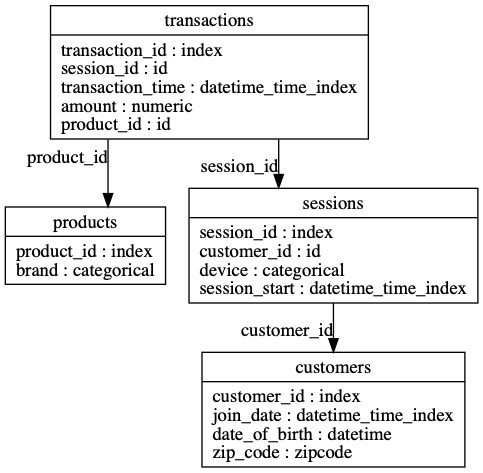

In [ ]:
# Loading data
data = ft.demo.load_mock_customer()

# Menyimpan data ke variabel
cust_df = data["customers"]
session_df = data["sessions"]
transaction_df = data["transactions"]

In [ ]:
# melihat data customer
cust_df.head()

,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [ ]:
# melihat data session
session_df.head()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


In [ ]:
# melihat data transaksi
transaction_df.head()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


# Feature Engineering Menggunakan Pandas

Secara umum terdapat dua metode feature engineering ini, yaitu melakukan aggregasi dan transformasi dari data-data yang sudah kita punya.

## Transformasi

In [ ]:
# Melakukan transformasi feature untuk mencari umur

# Menghitung umur berdasarkan tanggal join
today = dt.datetime.now().date()

cust_df['birthday'] = pd.to_datetime(cust_df['birthday']).dt.date

cust_df['age'] = (today - cust_df['birthday']) // pd.Timedelta(days=365)
cust_df.head()



,customer_id,zip_code,join_date,birthday,age
0,1,60091,2011-04-17 10:48:33,1994-07-18,28
1,2,13244,2012-04-15 23:31:04,1986-08-18,36
2,3,13244,2011-08-13 15:42:34,2003-11-21,19
3,4,60091,2011-04-08 20:08:14,2006-08-15,16
4,5,60091,2010-07-17 05:27:50,1984-07-28,38


## Aggregasi

In [ ]:
# menggabungkan data
session_transaction_df = pd.merge(session_df, transaction_df, on='session_id')
session_transaction_df.head()

,session_id,customer_id,device,session_start,transaction_id,transaction_time,product_id,amount
0,1,2,desktop,2014-01-01,298,2014-01-01 00:00:00,5,127.64
1,1,2,desktop,2014-01-01,2,2014-01-01 00:01:05,2,109.48
2,1,2,desktop,2014-01-01,308,2014-01-01 00:02:10,3,95.06
3,1,2,desktop,2014-01-01,116,2014-01-01 00:03:15,4,78.92
4,1,2,desktop,2014-01-01,371,2014-01-01 00:04:20,3,31.54


In [ ]:
# melakukan aggregasi feature
stats_amount = session_transaction_df.groupby('customer_id')['amount'].agg(['mean', 'max', 'min'])
stats_amount.columns = ['mean_amount', 'max_amount', 'min_amount']

# Merge dengan the clients dataframe
stats = cust_df.merge(stats_amount, left_on = 'customer_id', right_index=True, how = 'left')

# melakukan aggregasi feature
stats_count = session_transaction_df.groupby('customer_id')['session_id'].nunique()

# Merge dengan the clients dataframe
stats = stats.merge(stats_count, left_on = 'customer_id', right_index=True, how = 'left')
stats = stats.rename(columns={'session_id': 'session_count'})

stats.head(10)

,customer_id,zip_code,join_date,birthday,age,mean_amount,max_amount,min_amount,session_count
0,1,60091,2011-04-17 10:48:33,1994-07-18,28,71.631905,139.43,5.81,8
1,2,13244,2012-04-15 23:31:04,1986-08-18,36,77.422366,146.81,8.73,7
2,3,13244,2011-08-13 15:42:34,2003-11-21,19,67.060430,149.15,5.89,6
3,4,60091,2011-04-08 20:08:14,2006-08-15,16,80.070459,149.95,5.73,8
4,5,60091,2010-07-17 05:27:50,1984-07-28,38,80.375443,149.02,7.55,6


Kamu bisa terus mentransformasi dan menemukan fitur fitur yang cocok di gunakan di model yang akan kamu buat nantinya. Hanya saja itu membutuhkan kode yang panjang untuk setiap aggregasi atau transformasi yang dibuat.

Untung nya ada library featuretools yang bisa membantu kita untuk melakukan hal tersebut dengan lebih mudah yang akan kita bahas di section selanjutnya.

# Feature Engineering dengan featuretools

## Konsep Featuretools

Featuretools merupakan salah satu open-source Python libary yang membantu kita untuk membuat beberapa fitur dari kumpulan tabel-tabel yang saling berkaitan.

Konsep di balik Featuretools ini dinamakan "Deep Feature Synthesis". Sederhananya adalah saling menumpuk transformasi dan agregasi dari fitur fitur dasar untuk membuat fitur baru.



### Step 1 Inisiasi dataframes

In [ ]:
dataframes = {
    "customers": (cust_df, "customer_id"),
    "sessions": (session_df, "session_id", "session_start"),
    "transactions": (transaction_df, "transaction_id", "transaction_time"),
}

### Step 2 - Inisiasi relationship

In [ ]:
relationships = [
    ("sessions", "session_id", "transactions", "session_id"),
    ("customers", "customer_id", "sessions", "customer_id"),
]

### Step 3 - Membuat Features

In [ ]:
feature_matrix_customers, features_defs = ft.dfs(

    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",

)

feature_matrix_customers.head(3).T

customer_id,1,2,3
zip_code,60091,13244,13244
age,28,36,19
COUNT(sessions),8,7,6
MODE(sessions.device),mobile,desktop,desktop
NUM_UNIQUE(sessions.device),3,3,3
...,...,...,...
SUM(sessions.NUM_UNIQUE(transactions.product_id)),40.0,35.0,29.0
SUM(sessions.SKEW(transactions.amount)),-0.476122,-0.27764,2.286086
SUM(sessions.STD(transactions.amount)),312.745952,258.700528,257.299895
MODE(transactions.sessions.device),mobile,desktop,desktop


In [ ]:
feature = features_defs[1]
ft.describe_feature(feature)

'The number of all instances of "sessions" for each "customer_id" in "customers".'

Menampilkan spesifik transformasi saja

In [ ]:
ft.primitives.list_primitives()

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,percent_true,aggregation,True,False,Determines the percent of `True` values.,<ColumnSchema (Logical Type = BooleanNullable)...,<ColumnSchema (Logical Type = Double) (Semanti...
1,all,aggregation,True,False,Calculates if all values are 'True' in a list.,<ColumnSchema (Logical Type = BooleanNullable)...,<ColumnSchema (Logical Type = Boolean)>
2,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` ...",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
3,any,aggregation,True,False,Determines if any value is 'True' in a list.,<ColumnSchema (Logical Type = BooleanNullable)...,<ColumnSchema (Logical Type = Boolean)>
4,count_below_mean,aggregation,False,False,Determines the number of values that are below...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable)...
...,...,...,...,...,...,...,...
165,upper_case_count,transform,False,False,Calculates the number of upper case letters in...,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable)...
166,num_characters,transform,True,True,Calculates the number of characters in a given...,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable)...
167,rolling_mean,transform,False,False,Calculates the mean of entries over a given wi...,"<ColumnSchema (Semantic Tags = ['numeric'])>, ...",<ColumnSchema (Logical Type = Double) (Semanti...
168,equal_scalar,transform,True,True,Determines if values in a list are equal to a ...,<ColumnSchema>,<ColumnSchema (Logical Type = BooleanNullable)>


In [ ]:
feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",
    agg_primitives = ['mean', 'max','min'],
    trans_primitives = ['month','year']
)

feature_matrix_customers.head(3).T

/usr/local/lib/python3.9/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn(


customer_id,1,2,3
zip_code,60091.000000,13244.000000,13244.000000
MAX(transactions.amount),139.430000,146.810000,149.150000
MEAN(transactions.amount),71.631905,77.422366,67.060430
MIN(transactions.amount),5.810000,8.730000,5.890000
MONTH(birthday),7.000000,8.000000,11.000000
MONTH(join_date),4.000000,4.000000,8.000000
YEAR(birthday),1994.000000,1986.000000,2003.000000
YEAR(join_date),2011.000000,2012.000000,2011.000000
MAX(sessions.MEAN(transactions.amount)),88.755625,96.581000,82.109444
MAX(sessions.MIN(transactions.amount)),26.360000,56.460000,20.060000


### Menggabungkan data

In [ ]:
cust_df.merge(feature_matrix_customers, left_on = 'customer_id', right_index=True, how = 'left')



,customer_id,zip_code_x,join_date,birthday,zip_code_y,MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MONTH(birthday),MONTH(join_date),YEAR(birthday),YEAR(join_date),MAX(sessions.MEAN(transactions.amount)),MAX(sessions.MIN(transactions.amount)),MEAN(sessions.MAX(transactions.amount)),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.MIN(transactions.amount)),MIN(sessions.MAX(transactions.amount)),MIN(sessions.MEAN(transactions.amount))
0,1,60091,2011-04-17 10:48:33,1994-07-18,60091,139.43,71.631905,5.81,7,4,1994,2011,88.755625,26.36,132.246250,72.774140,9.823750,118.90,50.623125
1,2,13244,2012-04-15 23:31:04,1986-08-18,13244,146.81,77.422366,8.73,8,4,1986,2012,96.581000,56.46,133.090000,78.415122,22.085714,100.04,61.910000
2,3,13244,2011-08-13 15:42:34,2003-11-21,13244,149.15,67.060430,5.89,11,8,2003,2011,82.109444,20.06,141.271667,67.539577,11.035000,126.74,55.579412
3,4,60091,2011-04-08 20:08:14,2006-08-15,60091,149.95,80.070459,5.73,8,4,2006,2011,110.450000,54.83,144.748750,81.207189,16.438750,139.20,70.638182
4,5,60091,2010-07-17 05:27:50,1984-07-28,60091,149.02,80.375443,7.55,7,7,1984,2010,94.481667,20.65,139.960000,78.705187,14.415000,128.51,66.666667


# Terima Kasih

Q&A
- Apa kekurangan dari featuretools?